In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE

import joblib

In [ ]:
knn_model = joblib.load('models/knn.pkl')
rf_model = joblib.load('models/rf.pkl')
lightgbm_model = joblib.load('models/lightgbm.pkl')

In [65]:
X_train = joblib.load('data/X_train_preprocessed.pkl')
X_test = joblib.load('data/X_test_preprocessed.pkl')
y_train = joblib.load('data/y_train_preprocessed.pkl')
y_test = joblib.load('data/y_test_preprocessed.pkl')

In [66]:
#Voting SOFT, no SMOTE

voting_soft = VotingClassifier(
    estimators=[
        ('knn', knn_model),
        ('rf', rf_model),
        ('lightgbm', lightgbm_model)
    ],
    voting='soft'
)

In [69]:
voting_soft.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 966, number of negative: 4898
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002567 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1853
[LightGBM] [Info] Number of data points in the train set: 5864, number of used features: 129
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(metric='euclidean',
                                                   n_neighbors=1)),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=50,
                                                     max_features='log2',
                                                     min_samples_leaf=4,
                                                     n_estimators=500,
                                                     random_state=42)),
                             ('lightgbm',
                              LGBMClassifier(class_weight='balanced',
                                             colsample_bytree=np.float64(1.0),
                                             learning_rate=np.float64(0.1),
                                             max_depth=np.int64(16),
                                             n_estimators=np.int64(450),
                                             num_leaves=np.int64(80),
                                             random_state=42,
                                             subsample=np.float64(0.5)))],
                 voting='soft')

c:\Users\brend\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


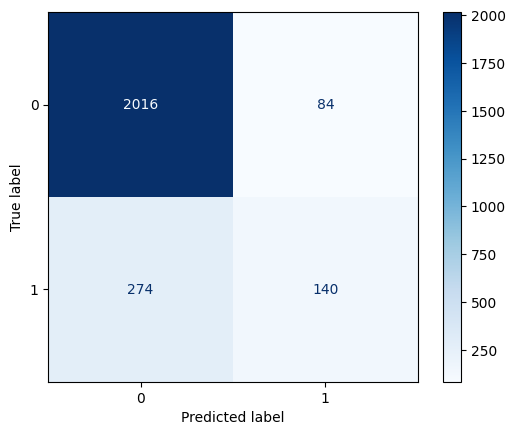

In [70]:
y_pred_soft = voting_soft.predict(X_test)

cm = confusion_matrix(y_test, y_pred_soft)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot(cmap='Blues')

In [71]:
print("Classification Report (Soft Voting):\n")
print(classification_report(y_test, y_pred_soft, digits=4))
print(f"Accuracy: {accuracy_score(y_test, y_pred_soft):.4f}")
print(f"F1-score (macro): {f1_score(y_test, y_pred_soft, average='macro'):.4f}")

Classification Report (Soft Voting):

              precision    recall  f1-score   support

           0     0.8803    0.9600    0.9185      2100
           1     0.6250    0.3382    0.4389       414

    accuracy                         0.8576      2514
   macro avg     0.7527    0.6491    0.6787      2514
weighted avg     0.8383    0.8576    0.8395      2514

Accuracy: 0.8576
F1-score (macro): 0.6787


In [72]:
#voting HARD, no SMOTE
voting_hard = VotingClassifier(
    estimators=[
        ('knn', knn_model),
        ('rf', rf_model),
        ('lightgbm', lightgbm_model)
    ],
    voting='hard'
)

In [73]:
voting_hard.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 966, number of negative: 4898
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002819 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1853
[LightGBM] [Info] Number of data points in the train set: 5864, number of used features: 129
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(metric='euclidean',
                                                   n_neighbors=1)),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=50,
                                                     max_features='log2',
                                                     min_samples_leaf=4,
                                                     n_estimators=500,
                                                     random_state=42)),
                             ('lightgbm',
                              LGBMClassifier(class_weight='balanced',
                                             colsample_bytree=np.float64(1.0),
                                             learning_rate=np.float64(0.1),
                                             max_depth=np.int64(16),
                                             n_estimators=np.int64(450),
                                             num_leaves=np.int64(80),
                                             random_state=42,
                                             subsample=np.float64(0.5)))])

c:\Users\brend\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


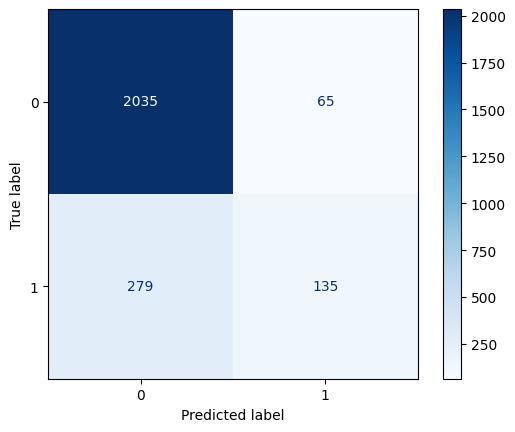

In [74]:
y_pred_hard = voting_hard.predict(X_test)

cm = confusion_matrix(y_test, y_pred_hard)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot(cmap='Blues')

In [75]:
print("Classification Report (Hard Voting):\n")
print(classification_report(y_test, y_pred_hard, digits=4))
print(f"Accuracy: {accuracy_score(y_test, y_pred_hard):.4f}")
print(f"F1-score (macro): {f1_score(y_test, y_pred_hard, average='macro'):.4f}")

Classification Report (Hard Voting):

              precision    recall  f1-score   support

           0     0.8794    0.9690    0.9221      2100
           1     0.6750    0.3261    0.4397       414

    accuracy                         0.8632      2514
   macro avg     0.7772    0.6476    0.6809      2514
weighted avg     0.8458    0.8632    0.8426      2514

Accuracy: 0.8632
F1-score (macro): 0.6809


APLICANDO SMOTE

In [76]:
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [77]:
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
lgb = LGBMClassifier(n_estimators=100, random_state=42, class_weight='balanced')

In [78]:
voting_clf_soft = VotingClassifier(
    estimators=[
        ('knn', knn),
        ('rf', rf),
        ('lgb', lgb)
    ],
    voting='soft'
)

In [79]:
voting_clf_soft.fit(X_train_resampled, y_train_resampled)

[LightGBM] [Info] Number of positive: 4898, number of negative: 4898
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006957 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31323
[LightGBM] [Info] Number of data points in the train set: 9796, number of used features: 129
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     random_state=42)),
                             ('lgb',
                              LGBMClassifier(class_weight='balanced',
                                             random_state=42))],
                 voting='soft')

c:\Users\brend\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


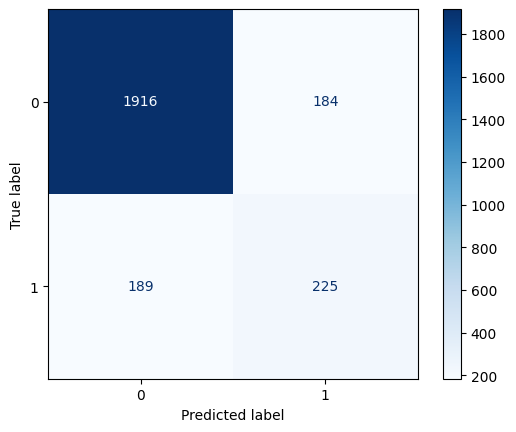

In [80]:
y_pred_clf_soft = voting_clf_soft.predict(X_test)

cm_soft = confusion_matrix(y_test, y_pred_clf_soft)
cmd_soft = ConfusionMatrixDisplay(cm_soft)
cmd_soft.plot(cmap='Blues')

In [ ]:
print("Classification Report (Smote Soft Voting):\n")
print(classification_report(y_test, y_pred_clf_soft, digits=4))
print(f"Accuracy: {accuracy_score(y_test, y_pred_clf_soft):.4f}")
print(f"F1-score (macro): {f1_score(y_test, y_pred_clf_soft, average='macro'):.4f}")


Classification Report (Smote Soft Voting):

              precision    recall  f1-score   support

           0     0.9102    0.9124    0.9113      2100
           1     0.5501    0.5435    0.5468       414

    accuracy                         0.8516      2514
   macro avg     0.7302    0.7279    0.7290      2514
weighted avg     0.8509    0.8516    0.8513      2514

Accuracy: 0.8516
F1-score (macro): 0.7290


In [82]:
voting_clf_hard = VotingClassifier(
    estimators=[
        ('knn', knn),
        ('rf', rf),
        ('lgb', lgb)
    ],
    voting='hard'
)

In [83]:
voting_clf_hard.fit(X_train_resampled, y_train_resampled)


[LightGBM] [Info] Number of positive: 4898, number of negative: 4898
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006695 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31323
[LightGBM] [Info] Number of data points in the train set: 9796, number of used features: 129
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     random_state=42)),
                             ('lgb',
                              LGBMClassifier(class_weight='balanced',
                                             random_state=42))])

c:\Users\brend\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


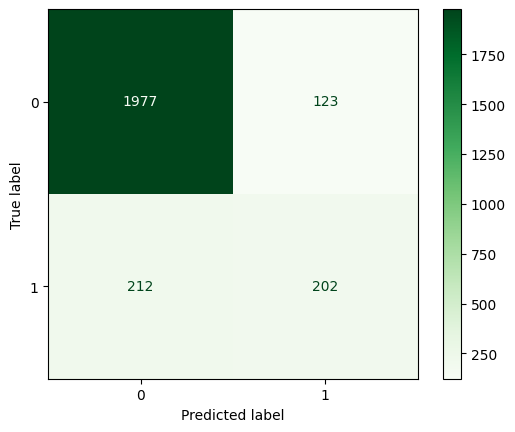

In [84]:
y_pred_clf_hard = voting_clf_hard.predict(X_test)

cm_hard = confusion_matrix(y_test, y_pred_clf_hard)
cmd_hard = ConfusionMatrixDisplay(cm_hard)
cmd_hard.plot(cmap='Greens')

In [85]:
print("Classification Report (Smote Hard Voting):\n")
print(classification_report(y_test, y_pred_clf_hard, digits=4))
print(f"Accuracy: {accuracy_score(y_test, y_pred_clf_hard):.4f}")
print(f"F1-score (macro): {f1_score(y_test, y_pred_clf_hard, average='macro'):.4f}")

Classification Report (Smote Hard Voting):

              precision    recall  f1-score   support

           0     0.9032    0.9414    0.9219      2100
           1     0.6215    0.4879    0.5467       414

    accuracy                         0.8667      2514
   macro avg     0.7623    0.7147    0.7343      2514
weighted avg     0.8568    0.8667    0.8601      2514

Accuracy: 0.8667
F1-score (macro): 0.7343


In [89]:
def save_best_model_auto(models_results: dict, y_true, metric: str = "f1_macro", path: str = "models/ch.pkl"):
    best_model_name = None
    best_model = None
    best_metric_value = -1

    print(f"\n🔍 Automatically evaluating models based on '{metric}':\n")

    for name, (model, y_pred) in models_results.items():
        acc = accuracy_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred, average='macro')
        recall_1 = recall_score(y_true, y_pred, pos_label=1)

        metric_value = {
            'accuracy': acc,
            'f1_macro': f1,
            'recall_1': recall_1
        }.get(metric, -1)

        print(f"Model: {name}, Accuracy: {acc:.4f}, F1-macro: {f1:.4f}, Recall-1: {recall_1:.4f}")

        # Decide best
        if metric_value > best_metric_value:
            best_metric_value = metric_value
            best_model_name = name
            best_model = model

    # Save best model
    if best_model is not None:
        joblib.dump(best_model, path)
        print(f"\n✅ Best model '{best_model_name}' saved to '{path}' based on '{metric}' = {best_metric_value:.4f}")
    else:
        print("❌ No model was saved (check metric names and results).")


In [90]:
models_results = {
    'soft_voting_no_smote': (voting_soft, y_pred_soft),
    'hard_voting_no_smote': (voting_hard, y_pred_hard),
    'soft_voting_smote': (voting_clf_soft, y_pred_clf_soft),
    'hard_voting_smote': (voting_clf_hard, y_pred_clf_hard)
}

In [91]:
save_best_model_auto(models_results, y_test, metric='f1_macro', path='models/ch.pkl')


🔍 Automatically evaluating models based on 'f1_macro':

Model: soft_voting_no_smote, Accuracy: 0.8576, F1-macro: 0.6787, Recall-1: 0.3382
Model: hard_voting_no_smote, Accuracy: 0.8632, F1-macro: 0.6809, Recall-1: 0.3261
Model: soft_voting_smote, Accuracy: 0.8516, F1-macro: 0.7290, Recall-1: 0.5435
Model: hard_voting_smote, Accuracy: 0.8667, F1-macro: 0.7343, Recall-1: 0.4879

✅ Best model 'hard_voting_smote' saved to 'models/ch.pkl' based on 'f1_macro' = 0.7343
